# **graphrag_tagger Demo**

*A lightweight toolkit for extracting topics from PDFs and visualizing their connections using graphs.*

## **1. Installation & Setup**
Ensure you have Python installed, then install the package locally:

```bash
pip install graphrag-tagger
```

In [ ]:
#pip install graphrag-tagger

Install all the **Core Dependecies**
- **PyMuPDF** – Extracts text from PDF files.
- **scikit-learn & ktrain** – Performs topic modeling.
- **LLM Client** – Enhances and refines extracted topics.
- **networkx** – Constructs and analyzes graphs.

```bash
pip install pymupdf scikit-learn ktrain llm networkx pytest
```

In [1]:
#pip install pymupdf scikit-learn ktrain llm networkx pytest

Load all the dependencies

## **2. Basic Usage**

Load a sample PDF document

In [7]:
#import the tagger module from the graphrag_tagger package
from graphrag_tagger import tagger
import os

# A sample PDF document Graph Retrieval-Augmented Generation: A Survey availabe at https://arxiv.org/pdf/2408.08921v2
# Define sample parameters
params = {
    'pdf_folder': 'Sample PDf',  # update path to your PDF folder
    'chunk_size': 256,
    'chunk_overlap': 25,
    'n_components': None,
    'n_features': 512,
    'min_df': 2,
    'max_df': 0.95,
    'llm_model': 'ollama:qwen2.5',
    'output_folder': 'results',  # update path to your output folder
    'model_choice': 'sk' # kt for ktrain or sk for scikit-learn
}


In [9]:
# # Create output folder if it doesn't exist

os.makedirs(params['output_folder'], exist_ok=True)

# # Run the tagging pipeline
tagger.main(params)

['Graph Retrieval-Augmented Generation: A Survey\nBOCI PENG∗, School of Intelligence Science and Technology, Peking University, China\nYUN ZHU∗, College of Computer Science and Technology, Zhejiang University, China\nYONGCHAO LIU, Ant Group, China\nXIAOHE BO, Gaoling School of Artificial Intelligence, Renmin University of China, China\nHAIZHOU SHI, Rutgers University, US\nCHUNTAO HONG, Ant Group, China\nYAN ZHANG†, School of Intelligence Science and Technology, Peking University, China\nSILIANG TANG, College of Computer Science and Technology, Zhejiang University, China\nRecently, Retrieval-Augmented Generation (RAG) has achieved remarkable success in addressing the challenges\nof Large Language Models (LLMs) without necessitating retraining. By referencing an external knowledge\nbase, RAG refines LLM outputs, effectively mitigating issues such as “hallucination”, lack of domain-specific\nknowledge, and outdated information. However, the complex structure of relationships among differe

Generating Tags: 100%|██████████| 191/191 [29:50<00:00,  9.37s/it]

Saved 191 chunk files to results


You can use any LLM available online for this demo we are using Ollama qwen2.5

for ```Ollama``` ```ConnectionError```  
Install and Setup Ollama from [Ollama Repo](https://github.com/ollama/ollama) and download the model **qwen2.5** for this demo code using 
```bash
ollama pull qwen2.5
```

## **3. Topic Extraction & Refinement**

In [ ]:
from glob import glob

# Get paths of all the chunk JSON files
files = glob(os.path.join(params["output_folder"], "chunk_*.json"))
len(files)

191

In [ ]:
import json

# Join all the chunk JSON files into a single list of dictionaries
raws: list[dict] = [json.load(open(file,encoding='utf-8')) for file in files]

for i, raw in enumerate(raws):
    if "chunk" not in raw:
        print(i, raw)
raw

{'chunk': 'scenarios such as intelligence report generation [139], patent phrase similarity detection [133] and software understanding [1]. Ranade and Joshi [139] first construct an Event Plot Graph (EPG) and retrieve the critical aspects of the events to aid the generation of intelligence reports. Peng and Yang [133] create a patent-phrase graph and retrieve the ego network of the given patent phrase to assist the judgment of phrase similarity. Alhanahnah et al. [1] propose a Chatbot to understand properties about dependencies in a given software package, which first automatically constructs the dependency graph and then the user can ask questions about the dependencies in the dependency graph.\n9.3\nBenchmarks and Metrics 9.3.1\nBenchmarks. The benchmarks used to evaluate the performance of the GraphRAG system can be divided into two categories. The first category is the corresponding datasets of downstream tasks. We summarize the benchmarks and papers tested with them according to t

In [ ]:
import json



raws: list[dict] = [json.load(open(file,encoding='utf-8')) for file in files]
raws = [{
    "chunk": raw["chunk"],
    "source_file": raw["source_file"],
    "chunk_file": file,
    **raw["classification"],
} for file, raw in zip(files, raws)]

print(raws[0].keys(),"\n")
print(raws[0]["chunk"])

dict_keys(['chunk', 'source_file', 'chunk_file', 'content_type', 'is_sufficient', 'topics']) 

Graph Retrieval-Augmented Generation: A Survey
BOCI PENG∗, School of Intelligence Science and Technology, Peking University, China
YUN ZHU∗, College of Computer Science and Technology, Zhejiang University, China
YONGCHAO LIU, Ant Group, China
XIAOHE BO, Gaoling School of Artificial Intelligence, Renmin University of China, China
HAIZHOU SHI, Rutgers University, US
CHUNTAO HONG, Ant Group, China
YAN ZHANG†, School of Intelligence Science and Technology, Peking University, China
SILIANG TANG, College of Computer Science and Technology, Zhejiang University, China
Recently, Retrieval-Augmented Generation (RAG) has achieved remarkable success in addressing the challenges of Large Language Models (LLMs) without necessitating retraining. By referencing an external knowledge base, RAG refines LLM outputs, effectively mitigating issues such as “hallucination”, lack of domain-specific knowledge, and ou

In [ ]:
import pandas as pd

# Create a DataFrame from the chunks which includes dict_keys(['chunk', 'source_file', 'chunk_file', 'content_type', 'is_sufficient', 'topics']) 

chunk_classification = pd.DataFrame(raws)

chunk_classification

,chunk,source_file,chunk_file,content_type,is_sufficient,topics
0,Graph Retrieval-Augmented Generation: A Survey...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_1.json,paragraph,True,"[Topic 3, Topic 4, Topic 10]"
1,"begin by introducing the GraphRAG workflow, al...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_10.json,paragraph,True,"[Topic 3, Topic 5, Topic 10]"
2,marks specifically designed for the GraphRAG s...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_100.json,paragraph,True,"[Topic 3, Topic 4, Topic 10]"
3,"111:28\nPeng et al.\nLLMs with graphs, which c...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_101.json,paragraph,True,"[Topic 4, Topic 10]"
4,"such as QA systems, metrics like BLEU, ROUGE-L...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_102.json,paragraph,True,"[Topic 3, Topic 6, Topic 10]"
...,...,...,...,...,...,...
186,application scenarios for its outstanding abil...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_95.json,paragraph,True,"[Topic 4, Topic 10]"
187,"9.2.2\nBiomedical. Recently, GraphRAG techniqu...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_96.json,paragraph,True,"[Topic 10, Topic 3]"
188,Graph Retrieval-Augmented Generation: A Survey...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_97.json,paragraph,True,"[Topic 3, Topic 4]"
189,"academic exploration, including predicting pot...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_98.json,paragraph,True,"[Topic 4, Topic 10, Topic 11]"


In [14]:
# Getting the list of extracted topics
extracted_topics = json.load(open("results/topics.json",encoding='utf-8'))["topics"]

# Mapping the topic ids provided by the LLM to the corresponding topic names saved in the topics.json file
def map_topics(topic_ids):
    return [extracted_topics[int(topic.split()[1])-1] for topic in topic_ids if topic not in extracted_topics and "Topic " in topic]

chunk_classification['extracted_topics'] = chunk_classification['topics'].map(map_topics)
chunk_classification

,chunk,source_file,chunk_file,content_type,is_sufficient,topics,extracted_topics
0,Graph Retrieval-Augmented Generation: A Survey...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_1.json,paragraph,True,"[Topic 3, Topic 4, Topic 10]","[Retrieval Techniques, Knowledge Graphs, Natur..."
1,"begin by introducing the GraphRAG workflow, al...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_10.json,paragraph,True,"[Topic 3, Topic 5, Topic 10]","[Retrieval Techniques, Training Methods, Natur..."
2,marks specifically designed for the GraphRAG s...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_100.json,paragraph,True,"[Topic 3, Topic 4, Topic 10]","[Retrieval Techniques, Knowledge Graphs, Natur..."
3,"111:28\nPeng et al.\nLLMs with graphs, which c...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_101.json,paragraph,True,"[Topic 4, Topic 10]","[Knowledge Graphs, Natural Language Processing]"
4,"such as QA systems, metrics like BLEU, ROUGE-L...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_102.json,paragraph,True,"[Topic 3, Topic 6, Topic 10]","[Retrieval Techniques, Query Retrieval, Natura..."
...,...,...,...,...,...,...,...
186,application scenarios for its outstanding abil...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_95.json,paragraph,True,"[Topic 4, Topic 10]","[Knowledge Graphs, Natural Language Processing]"
187,"9.2.2\nBiomedical. Recently, GraphRAG techniqu...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_96.json,paragraph,True,"[Topic 10, Topic 3]","[Natural Language Processing, Retrieval Techni..."
188,Graph Retrieval-Augmented Generation: A Survey...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_97.json,paragraph,True,"[Topic 3, Topic 4]","[Retrieval Techniques, Knowledge Graphs]"
189,"academic exploration, including predicting pot...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_98.json,paragraph,True,"[Topic 4, Topic 10, Topic 11]","[Knowledge Graphs, Natural Language Processing..."


In [15]:
# Though the main method of the tagger module uses LLM prompt to extract clean topics from the Chunk files you can explicitely use the LLM.clean_topics
from graphrag_tagger.chat.llm import LLM, LLMService

# Initialize the LLM you want to use
llm_service = LLMService(model="ollama:qwen2.5")
llm = LLM(llm_service=llm_service) 

# Get the cleaned topics for each of the extracted topics 
clean_topics = chunk_classification['extracted_topics'].map(llm.clean_topics)
print(clean_topics)
chunk_classification


0             [Retrieval Methods, Knowledge Graphs, NLP]
1      [Retrieval Methods, Training Approaches, Natur...
2             [Retrieval Methods, Knowledge Graphs, NLP]
3                   [Knowledge Graphs, Natural Language]
4      [Retrieval Methods, Query Processing, Language...
                             ...                        
186                 [Knowledge Graphs, Natural Language]
187    [Natural Language Processing, Retrieval Techni...
188                [Retrieval Methods, Knowledge Graphs]
189         [Knowledge Graphs, NLP, Information Systems]
190                              [Retrieval, Query, NLP]
Name: extracted_topics, Length: 191, dtype: object


,chunk,source_file,chunk_file,content_type,is_sufficient,topics,extracted_topics
0,Graph Retrieval-Augmented Generation: A Survey...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_1.json,paragraph,True,"[Topic 3, Topic 4, Topic 10]","[Retrieval Techniques, Knowledge Graphs, Natur..."
1,"begin by introducing the GraphRAG workflow, al...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_10.json,paragraph,True,"[Topic 3, Topic 5, Topic 10]","[Retrieval Techniques, Training Methods, Natur..."
2,marks specifically designed for the GraphRAG s...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_100.json,paragraph,True,"[Topic 3, Topic 4, Topic 10]","[Retrieval Techniques, Knowledge Graphs, Natur..."
3,"111:28\nPeng et al.\nLLMs with graphs, which c...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_101.json,paragraph,True,"[Topic 4, Topic 10]","[Knowledge Graphs, Natural Language Processing]"
4,"such as QA systems, metrics like BLEU, ROUGE-L...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_102.json,paragraph,True,"[Topic 3, Topic 6, Topic 10]","[Retrieval Techniques, Query Retrieval, Natura..."
...,...,...,...,...,...,...,...
186,application scenarios for its outstanding abil...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_95.json,paragraph,True,"[Topic 4, Topic 10]","[Knowledge Graphs, Natural Language Processing]"
187,"9.2.2\nBiomedical. Recently, GraphRAG techniqu...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_96.json,paragraph,True,"[Topic 10, Topic 3]","[Natural Language Processing, Retrieval Techni..."
188,Graph Retrieval-Augmented Generation: A Survey...,Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_97.json,paragraph,True,"[Topic 3, Topic 4]","[Retrieval Techniques, Knowledge Graphs]"
189,"academic exploration, including predicting pot...",Sample PDf\Graph Retrieval-Augmented Generatio...,results\chunk_98.json,paragraph,True,"[Topic 4, Topic 10, Topic 11]","[Knowledge Graphs, Natural Language Processing..."


## **4. Graph Construction & Visualization**


In [21]:
import os
import pytest
from graphrag_tagger.build_graph import process_graph



# Define sample input and output folders
input_folder = (
    "results"  # update this path to your folder containing JSON files
)
output_folder = (
    "graph_outputs"    # update this path where you want your result to be stored
)

# # Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process graph with a specified threshold percentile (e.g., 97.5)
graph = process_graph(
    input_folder,
    output_folder,
    threshold_percentile=97.5,
    content_type_filter="paragraph", # Use only paragraph for chunk graph builder
)


# # The processed graph is stored in 'graph' and the connected components map is saved to the output folder.
print("Graph processing completed.")


Processing graph...
Found 191 files in results.
Filtering by content type: paragraph


Loading raw files: 100%|██████████| 191/191 [00:00<00:00, 5923.46it/s]


Loaded 118 raw documents.
Computing scores...
Scores computed.
Building graph...


Building nodes & edges: 100%|██████████| 118/118 [00:00<00:00, 6365.39it/s]

Graph built. Nodes: 118 Edges: 5654
Starting graph pruning...
Min weight: 2.066947269761297
Max weight: 10.879893926048261
Mean weight: 4.5432500468115755
Median weight: 3.7509374747077997
Pruning threshold (97.5th percentile): 8.298795081963835
Removing 5342 edges out of 5654...
Graph pruned. Nodes: 118 Edges: 312
Computing connected components...
Number of connected components: 65
Component sizes (min, max, mean): 1 23 1.8153846153846154
Connected components map saved to graph_outputs\connected_components.json
Graph processing complete.
Graph processing completed.


In [ ]:
import json
import os

# Extract the connected_components List from the JSON file stored after graoh processing
graph_edges: dict = json.load(open(os.path.join(output_folder, "connected_components.json")))
graph_edges

{'0': 0,
 '2': 0,
 '5': 0,
 '7': 0,
 '16': 0,
 '17': 0,
 '20': 0,
 '24': 0,
 '26': 0,
 '28': 0,
 '30': 0,
 '38': 0,
 '41': 0,
 '46': 0,
 '47': 0,
 '52': 0,
 '55': 0,
 '76': 0,
 '80': 0,
 '95': 0,
 '108': 0,
 '110': 0,
 '112': 0,
 '1': 1,
 '18': 1,
 '107': 1,
 '105': 1,
 '3': 2,
 '33': 3,
 '4': 3,
 '37': 3,
 '75': 3,
 '117': 3,
 '59': 3,
 '40': 4,
 '6': 4,
 '8': 5,
 '9': 6,
 '10': 7,
 '27': 7,
 '98': 8,
 '11': 8,
 '94': 8,
 '82': 9,
 '12': 9,
 '106': 9,
 '13': 10,
 '14': 11,
 '74': 12,
 '15': 12,
 '19': 13,
 '21': 14,
 '60': 15,
 '45': 15,
 '22': 15,
 '23': 16,
 '25': 17,
 '29': 18,
 '31': 19,
 '32': 20,
 '34': 21,
 '35': 22,
 '36': 23,
 '39': 24,
 '42': 25,
 '43': 26,
 '44': 27,
 '111': 27,
 '48': 28,
 '89': 29,
 '49': 29,
 '50': 30,
 '96': 31,
 '51': 31,
 '53': 32,
 '92': 33,
 '54': 33,
 '65': 34,
 '68': 34,
 '69': 34,
 '73': 34,
 '56': 34,
 '63': 34,
 '72': 35,
 '57': 35,
 '61': 35,
 '71': 35,
 '58': 36,
 '62': 37,
 '64': 38,
 '66': 39,
 '91': 39,
 '67': 40,
 '70': 41,
 '77': 42,
 '7

In [ ]:
# Find The chunks and all the chunks they are connected to
connected_chunks = {}
for k,v in graph_edges.items():
    if v in connected_chunks:
        connected_chunks[v].append(int(k))
    else:
        connected_chunks[v] = [int(k)]
connected_chunks

{0: [0,
  2,
  5,
  7,
  16,
  17,
  20,
  24,
  26,
  28,
  30,
  38,
  41,
  46,
  47,
  52,
  55,
  76,
  80,
  95,
  108,
  110,
  112],
 1: [1, 18, 107, 105],
 2: [3],
 3: [33, 4, 37, 75, 117, 59],
 4: [40, 6],
 5: [8],
 6: [9],
 7: [10, 27],
 8: [98, 11, 94],
 9: [82, 12, 106],
 10: [13],
 11: [14],
 12: [74, 15],
 13: [19],
 14: [21],
 15: [60, 45, 22],
 16: [23],
 17: [25],
 18: [29],
 19: [31],
 20: [32],
 21: [34],
 22: [35],
 23: [36],
 24: [39],
 25: [42],
 26: [43],
 27: [44, 111],
 28: [48],
 29: [89, 49],
 30: [50],
 31: [96, 51],
 32: [53],
 33: [92, 54],
 34: [65, 68, 69, 73, 56, 63],
 35: [72, 57, 61, 71],
 36: [58],
 37: [62],
 38: [64],
 39: [66, 91],
 40: [67],
 41: [70],
 42: [77],
 43: [78],
 44: [79],
 45: [81],
 46: [83],
 47: [84],
 48: [85],
 49: [86],
 50: [87],
 51: [88],
 52: [90],
 53: [93],
 54: [97],
 55: [99],
 56: [100],
 57: [101],
 58: [102],
 59: [104, 103],
 60: [109],
 61: [113],
 62: [114],
 63: [115],
 64: [116]}

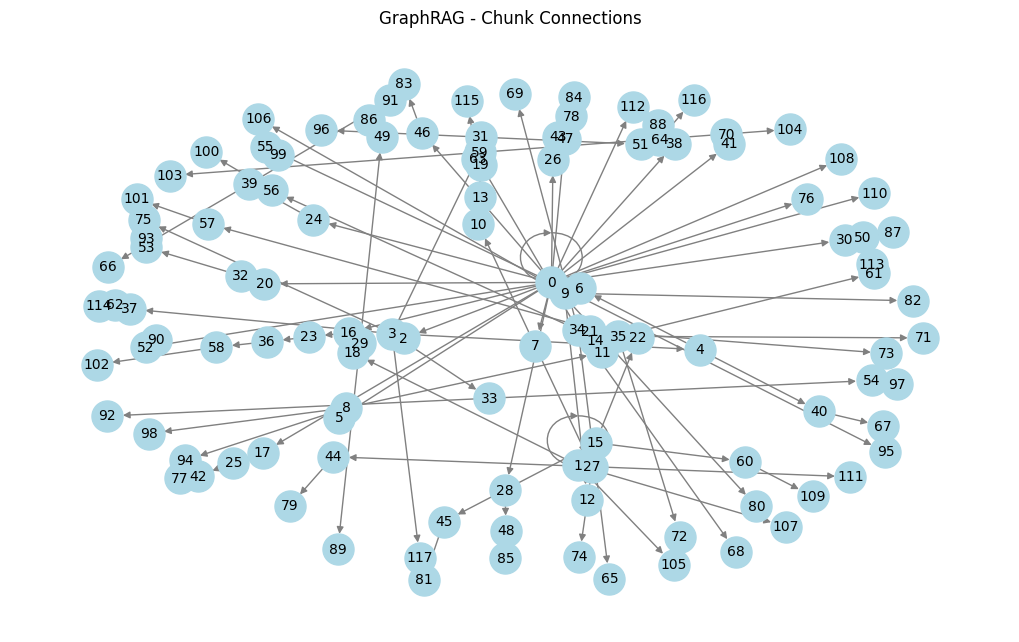

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a Graph object
G = nx.DiGraph()

# Add edges based on the adjacency list
for parent, children in connected_chunks.items():
    for child in children:
        G.add_edge(parent, child)  # Connect parent to each child

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=10)

plt.title("GraphRAG - Chunk Connections")
plt.show()


In [24]:
from pyvis.network import Network

# Initialize Pyvis Network
net = Network(notebook=True, height="600px", width="100%", bgcolor="#222222", font_color="white",directed=True)

# Add nodes & edges
for parent, children in connected_chunks.items():
    net.add_node(parent, label=f"Chunk {parent}", color="red",title=chunk_classification["extracted_topics"].iloc[parent])  # Parent nodes
    for child in children:
        if parent != child:  # Avoid self-edges
            net.add_node(child, label=f"Chunk {child}", color="lightblue",title=chunk_classification["extracted_topics"].iloc[parent])  # Child nodes
            net.add_edge(parent, child)  # Connect edges
# Save and Display
net.force_atlas_2based()
net.write_html("graph.html")
os.startfile("graph.html")
